# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
temp_units = "Imperial"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# # Starting URL for Weather Map API Call
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# #Create empty lists to hold results
# city_name=[]
# lat=[]
# long=[]
# max_temp=[]
# humidity=[]
# cloudiness=[]
# wind_speed=[]
# country=[]
# date=[]

# record = 0
# set = 1

# # Log file print statement
# print(f"Beginning Data Retrieval")
# print(f"-------------------------------")

# for city in cities[:50]:
#     try:
#         response = requests.get(f"{url}&q={city}").json() 
#         city_name.append(response["name"])
#         lat.append(response["coord"]["lat"])
#         long.append(response["coord"]["lon"])
#         max_temp.append(response["main"]["temp_max"])
#         humidity.append(response["main"]["humidity"])
#         cloudiness.append(response["clouds"]["all"])
#         wind_speed.append(response["wind"]["speed"])
#         country.append(response["sys"]["country"])
#         date.append(response["dt"])
#         if record>48:
#             record=1
#             set+=1
#             city_name.append(response["name"])
#             time.sleep(.2)
#         else:
#             record+=1
#             #city_name.append(response["name"])
#         print(f"Processing Record {record} of Set {set} | {city}")
#     except(KeyError, IndexError):
#          print("City not found. Skipping...")
# print("------------------------------\nData Retrieval Complete\n------------------------------")
    
        
  

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | kavali
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | letterkenny
Processing Record 4 of Set 1 | half moon bay
Processing Record 5 of Set 1 | nanakuli
Processing Record 6 of Set 1 | riyadh
Processing Record 7 of Set 1 | isla mujeres
Processing Record 8 of Set 1 | cape canaveral
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | albany
City not found. Skipping...
Processing Record 11 of Set 1 | agadir
Processing Record 12 of Set 1 | raghogarh
Processing Record 13 of Set 1 | san cristobal
Processing Record 14 of Set 1 | washougal
Processing Record 15 of Set 1 | komsomolskiy
City not found. Skipping...
Processing Record 16 of Set 1 | havelock
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | katsuura
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | abha
Processing Rec

In [5]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


#Create empty lists to hold results
city_data=[]

record = 1
set = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for i,city in enumerate(cities):
    if (i%50==0 & i>50):
            record=0
            set+=1
    record+=1
    try:
        response = requests.get(f"{url}&q={city}").json() 
        lat=response["coord"]["lat"]
        long=response["coord"]["lon"]
        max_temp=response["main"]["temp_max"]
        humidity=response["main"]["humidity"]
        cloudiness=response["clouds"]["all"]
        wind_speed=response["wind"]["speed"]
        country=response["sys"]["country"]
        date=response["dt"]
        city_data.append([city, lat, long, max_temp, humidity, cloudiness, wind_speed, country, date])
        time.sleep(.2)
        
        print(f"Processing Record {record} of Set {set} | {city}")
    except(KeyError, IndexError):
         print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")
    
        
  

Beginning Data Retrieval
-------------------------------
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | capoterra
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | prado
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | cidreira
Processing Record 11 of Set 1 | abu samrah
Processing Record 12 of Set 1 | upata
City not found. Skipping...
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | general roca
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | dunedin
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | kruisfontein
Processing Record 20 of Set 1 | bhalki
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | kabo
Processing Record 23 of Set 1 | khatanga
City not found. Skipping...
Processing Record 25 of Set 1 | labuh

Processing Record 206 of Set 1 | mingaora
Processing Record 207 of Set 1 | ugoofaaru
Processing Record 208 of Set 1 | sao filipe
Processing Record 209 of Set 1 | martapura
Processing Record 210 of Set 1 | salalah
Processing Record 211 of Set 1 | saint-leu
Processing Record 212 of Set 1 | portage lakes
Processing Record 213 of Set 1 | hammerfest
Processing Record 214 of Set 1 | chengde
City not found. Skipping...
Processing Record 216 of Set 1 | nishihara
Processing Record 217 of Set 1 | maldonado
Processing Record 218 of Set 1 | asau
Processing Record 219 of Set 1 | aksehir
Processing Record 220 of Set 1 | taltal
Processing Record 221 of Set 1 | hamilton
Processing Record 222 of Set 1 | caravelas
Processing Record 223 of Set 1 | luderitz
Processing Record 224 of Set 1 | port hardy
Processing Record 225 of Set 1 | gat
Processing Record 226 of Set 1 | meulaboh
Processing Record 227 of Set 1 | sakaiminato
Processing Record 228 of Set 1 | oksovskiy
Processing Record 229 of Set 1 | dingle
P

Processing Record 406 of Set 1 | kashi
Processing Record 407 of Set 1 | katsuura
Processing Record 408 of Set 1 | quzhou
City not found. Skipping...
Processing Record 410 of Set 1 | qobustan
Processing Record 411 of Set 1 | cayenne
Processing Record 412 of Set 1 | slupsk
Processing Record 413 of Set 1 | verkhoyansk
Processing Record 414 of Set 1 | phan thiet
Processing Record 415 of Set 1 | nizhniy kuranakh
City not found. Skipping...
Processing Record 417 of Set 1 | atbasar
Processing Record 418 of Set 1 | dali
Processing Record 419 of Set 1 | adrar
Processing Record 420 of Set 1 | cururupu
Processing Record 421 of Set 1 | ilave
Processing Record 422 of Set 1 | saint-augustin
City not found. Skipping...
Processing Record 424 of Set 1 | dhankuta
Processing Record 425 of Set 1 | zhezkazgan
Processing Record 426 of Set 1 | vila franca do campo
Processing Record 427 of Set 1 | korla
City not found. Skipping...
Processing Record 429 of Set 1 | leh
Processing Record 430 of Set 1 | coihaique

Processing Record 603 of Set 1 | hinton
Processing Record 604 of Set 1 | eregli
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Convert Raw Data into a Dataframe
#create dataframe
weather_df = pd.DataFrame(city_data,columns=["City", "Lat", "Long", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])

#display dataframe
weather_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuktoyaktuk,69.4541,-133.0374,-2.20,78,75,13.80,CA,1615852949
1,capoterra,39.1763,8.9718,55.99,67,20,19.57,IT,1615852949
2,hithadhoo,-0.6000,73.0833,83.23,69,80,10.09,MV,1615852950
3,prado,-17.3411,-39.2208,76.37,79,0,7.67,BR,1615852951
4,east london,-33.0153,27.9116,69.89,78,83,15.55,ZA,1615852953


In [7]:
# output data to csv
weather_df.to_csv("weatherpy.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

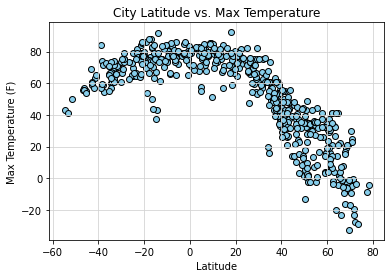

In [8]:

plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig1.png")
plt.show()

## Latitude vs. Humidity Plot

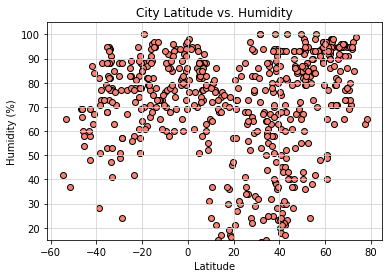

In [9]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="salmon")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

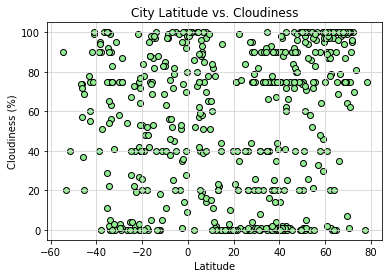

In [10]:

plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="lightgreen")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

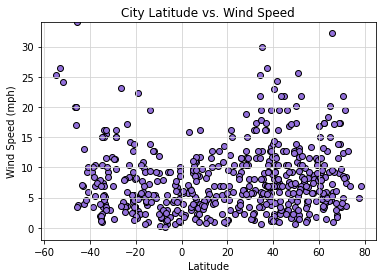

In [11]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="mediumpurple")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig4.png")
plt.show()

## Linear Regression

In [12]:
#Define Linear Regression function
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

# Create Northern and Southern Hemisphere DataFrames
northlat_df = weather_df.loc[weather_df["Lat"] >= 0,:]
southlat_df = weather_df.loc[weather_df["Lat"] < 0,:]

northlat_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuktoyaktuk,69.4541,-133.0374,-2.20,78,75,13.80,CA,1615852949
1,capoterra,39.1763,8.9718,55.99,67,20,19.57,IT,1615852949
6,bethel,41.3712,-73.4140,27.00,30,0,6.93,US,1615852864
9,abu samrah,35.3029,37.1841,49.42,84,16,5.30,SY,1615852955
10,upata,8.0086,-62.3989,78.01,88,100,4.00,VE,1615852956


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8803457678436163


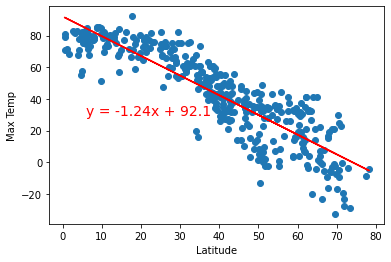

<Figure size 432x288 with 0 Axes>

In [23]:
#Northern Hemisphere - Max Temp vs. Latitude, Linear Regression
x_values = northlat_df["Lat"]
y_values = northlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('northern_temp_lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5872413938747892


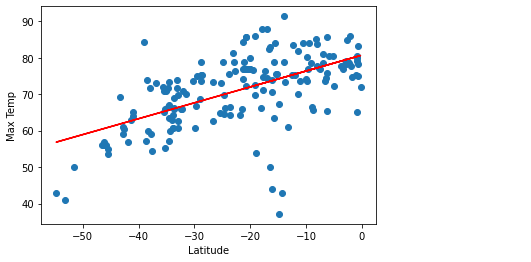

<Figure size 432x288 with 0 Axes>

In [24]:
#Southern Hemisphere - Max Temp vs. Latitude, Linear Regression
x_values = southlat_df["Lat"]
y_values = southlat_df["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

plt.savefig('southern_temp_lat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.25077361099585005


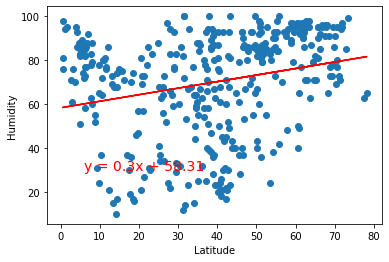

<Figure size 432x288 with 0 Axes>

In [25]:
#Northern Hemisphere - Humidity (%) vs. Latitude, Linear Regression
x_values = northlat_df["Lat"]
y_values = northlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('northern_humid_lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.35778857242285195


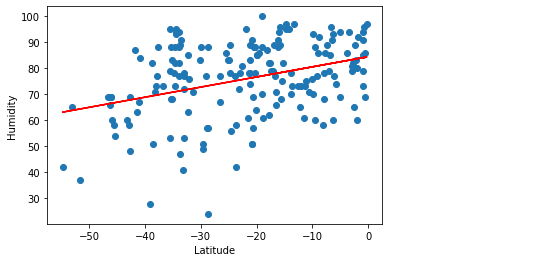

<Figure size 432x288 with 0 Axes>

In [26]:
#Southern Hemisphere - Humidity (%) vs. Latitude, Linear Regression
x_values = southlat_df["Lat"]
y_values = southlat_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(6,30))

plt.savefig('southern_humid_lat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24240467450801592


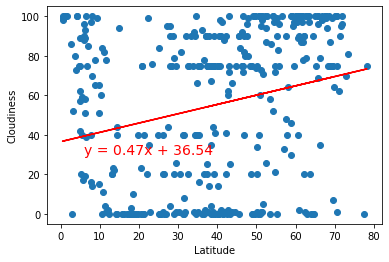

<Figure size 432x288 with 0 Axes>

In [27]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude, Linear Regression
x_values = northlat_df["Lat"]
y_values = northlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('northern_cloud_lat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007569778589313749


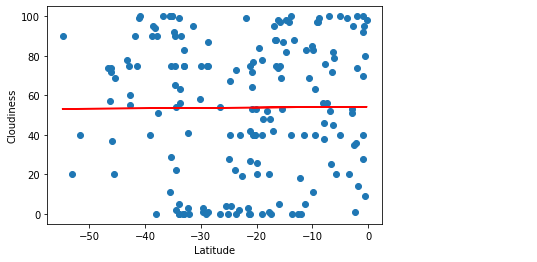

<Figure size 432x288 with 0 Axes>

In [28]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude, Linear Regression
x_values = southlat_df["Lat"]
y_values = southlat_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(6,30))

plt.savefig('southern_cloud_lat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.14997507828596807


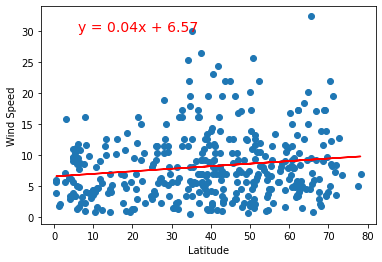

<Figure size 432x288 with 0 Axes>

In [29]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude, Linear Regression
x_values = northlat_df["Lat"]
y_values = northlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('northern_wind_lat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.4207418328075576


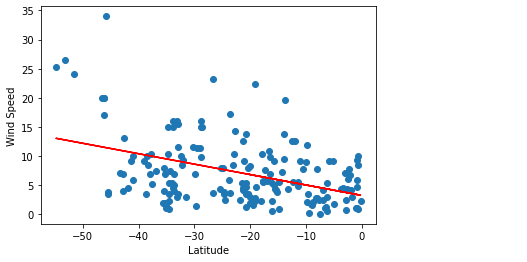

<Figure size 432x288 with 0 Axes>

In [31]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude, Linear Regression

x_values = southlat_df["Lat"]
y_values = southlat_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(6,30))

plt.savefig('southernwindlat.png')

In [85]:
print("The low r values indicate a weak positive to no relationship between latitude and wind speed, latitude and cloudiness, or latitude and humidity on both the Southern and Northern Hemispheres. The only strong positive correlation(and higher r value,) was between latitude and max tempurature in both hemispheres - which you'd expect.")

The low r values indicate a weak positive to no relationship between latitude and wind speed, latitude and cloudiness, or latitude and humidity on both the Southern and Northern Hemispheres. The only strong positive correlation(and higher r value,) was between latitude and max tempurature in both hemispheres - which you'd expect.
